<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/DL/C03_20240417_MNISTDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import numpy as np

In [66]:
#se hace referencia a su nombre
#lo divide en conjuntos de "train" ->tren y un "test" -> conjunto de datos de prueba

dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [67]:
class_names = metadata.features['label'].names
print("Nombres: {}".format(class_names))

Nombres: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [68]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Ejemplos de Formación: {}".format(num_train_examples))
print("Ejemplos de prueba:	{}".format(num_test_examples))

Ejemplos de Formación: 60000
Ejemplos de prueba:	10000


In [69]:
#Utilizamos una función normalizada que se applica en cada elemento del conjunto de datos llamados a.map
def normalize(images, labels):
#la que convierte a cada valor del pixel de tipo flotante
    images = tf.cast(images, tf.float32)
#los rango de valores de pixeles sera un numero entre 0 a 255 pixeles
    images /= 255
#retorna las pares de imagenes y etiquetas
    return images, labels

#es la funcion normalizada
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#es la funcion normalizada
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

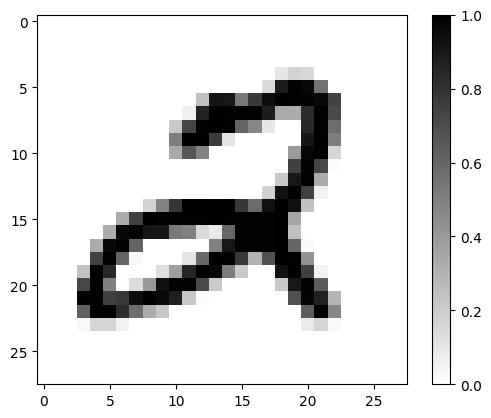

In [70]:
# Tome una sola imagen y elimine la dimensión de color remodelándola
for image, label in test_dataset.take(1):
    break
    image = image.numpy().reshape((28,28))

# Traza la imagen: listo, una prenda de moda.
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()


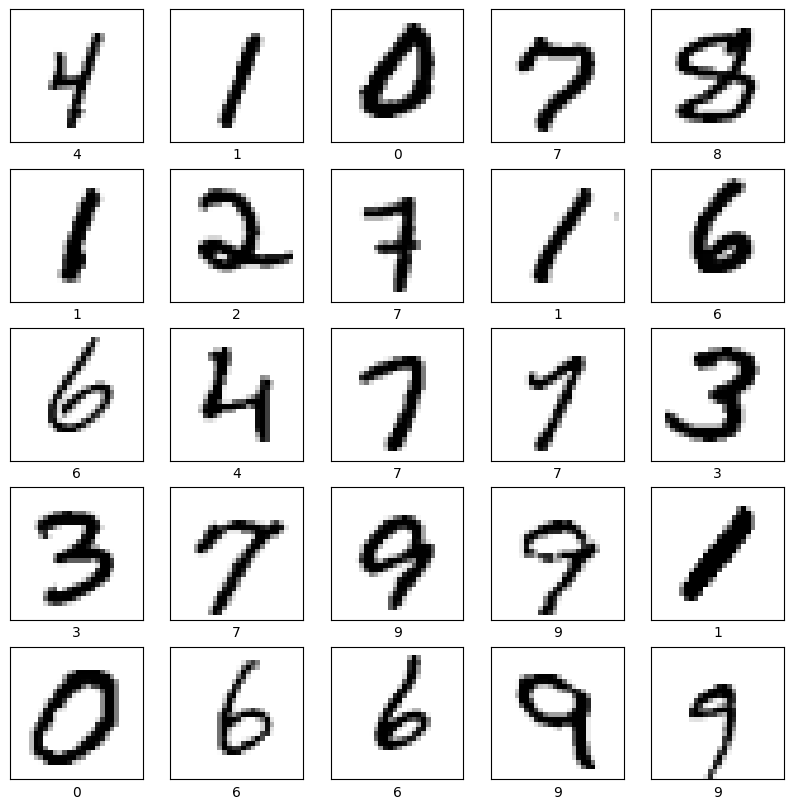

In [71]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [72]:
model = tf.keras.Sequential([
# aplanamos la imagen de entrada de 28,28, y la unica matriz unidimensional
# que tiene 784 elementos
                              tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #se aplica una capa densa de 128 neuronas para poder clasificar Fashion MNIST
                              tf.keras.layers.Dense(128, activation=tf.nn.relu),#finalmente la salida es una capa densa de 10 salidas esta es la probalidad
                                                                                # para las diferentes pruebas de vestir
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                              ])


In [73]:
#Utilizamos Adam como una cadena de parámetro para el optimizador
model.compile(optimizer='adam', #se utiliza para realizar la clasificación
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), #visulaizamos las métricas de precisión durante el entrenamiento
              metrics=['accuracy'])


In [74]:
BATCH_SIZE = 32
#indica la repetición del conjunto de datos al iterarse #shuffle:aleatoriza el orden de los ejemplos y agrupa por lotes de 32 ejemplos
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE) #Se necesita especificar el lote
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [75]:
#determina los parámetros del método de ajuste
model.fit(train_dataset, epochs=5,
          steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.2545 - accuracy: 0.9283
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1143 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0776 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0561 - accuracy: 0.9833
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9862


In [76]:
#Utilizamos la función del modelo llamdado elavuate("evaluar") que evalua el conjunto #de datos de prueba
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)


313/313 [==============================] - 2s 5ms/step - loss: 0.0755 - accuracy: 0.9781
Accuracy on test dataset: 0.9781000018119812


In [77]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)


1/1 [==============================] - 0s 53ms/step


In [78]:
predictions.shape

(32, 10)

In [79]:
predictions[0]

array([1.7753393e-10, 2.0894098e-09, 9.9999529e-01, 3.7496543e-06,
       2.9272309e-09, 1.8203588e-09, 2.3036007e-08, 2.5617077e-09,
       8.3663070e-07, 1.5368693e-08], dtype=float32)

In [80]:
np.argmax(predictions[0])

2

In [81]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

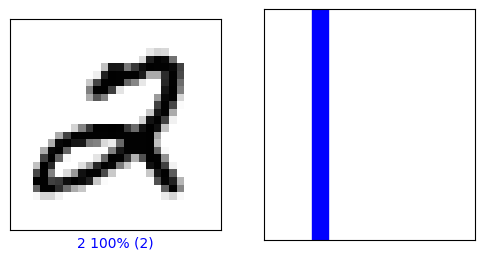

In [82]:
#la primera predicción
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


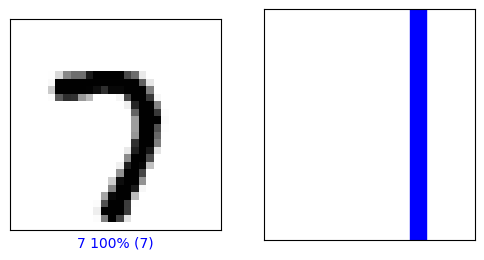

In [83]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

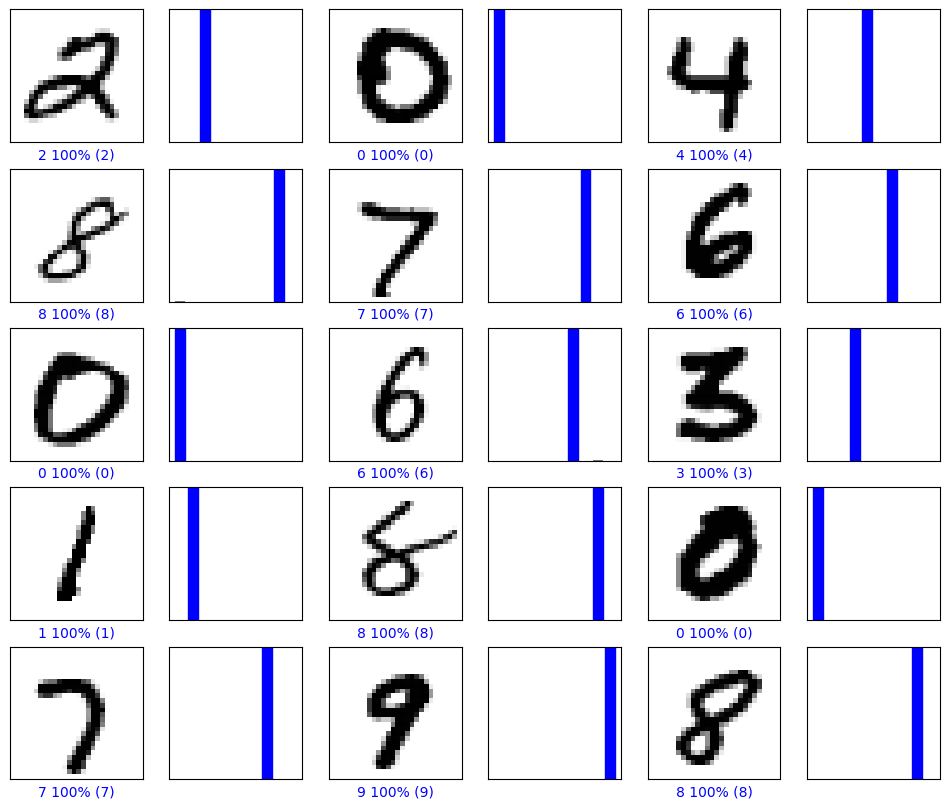

In [84]:
# Traza las primeras X imágenes de prueba, su etiqueta predicha y la etiqueta verdadera
# Colorea las predicciones correctas en azul, las predicciones incorrectas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [85]:
# Tomar una imagen del conjunto de datos de prueba
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [86]:
# Agregue la imagen a un lote donde sea el único miembro.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [87]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 290ms/step
[[1.7753529e-10 2.0894138e-09 9.9999535e-01 3.7496618e-06 2.9272422e-09
  1.8203624e-09 2.3036009e-08 2.5617126e-09 8.3663400e-07 1.5368723e-08]]


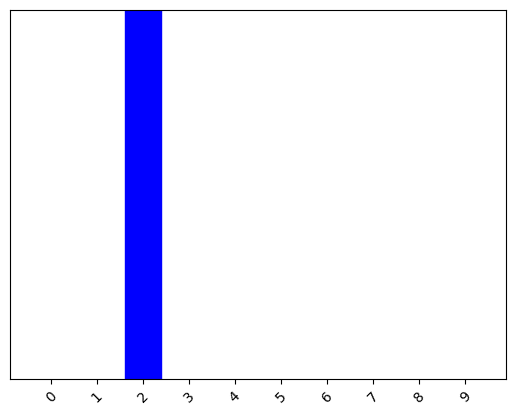

In [88]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [89]:
np.argmax(predictions_single[0])

2